In [30]:
from pathlib import Path
import numpy as np
DATA_PATH = Path('/home/engaclew/neurogen/results/conf')
group_ids = ['low_risk', 'all', 'angelman_syndrome', 
             'autism_sibling', 'down_syndrome', 
             'fragile_x_syndrome']

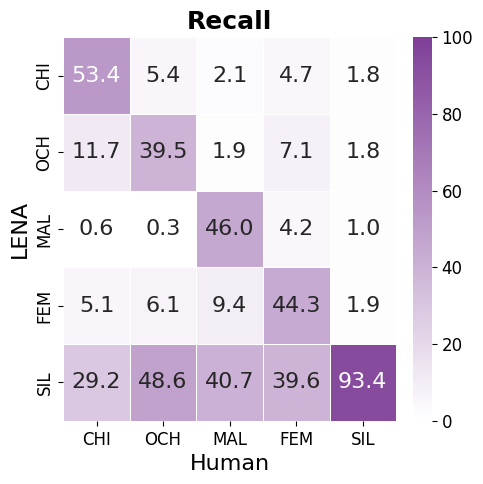

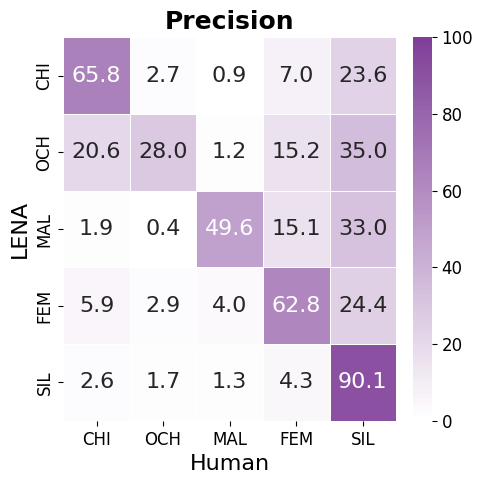

In [31]:
# Confusion matrices for all group
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 16, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
lena_color = '#7F3F98'
aclew_color = '#FF7F00' 
def plot_conf(conf, norm, ylabel, title=None, save=None, color='red'):
    if norm == 0:
        conf = 100*conf / conf.sum(axis=0)
    elif norm == 1:
        conf = 100*conf / conf.sum(axis=1)[:, np.newaxis]
    
    # Create custom colormap
    colors = ['white', color]  # From white to specified color
    n_bins = 100  # Number of color gradations
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", colors, N=n_bins)
    
    cm = 1/2.54
    fig, ax = plt.subplots(1,1, figsize=(12*cm,12*cm), constrained_layout=True)
    
    # Use custom colormap in heatmap
    sn.heatmap(conf, annot=True, ax=ax, fmt=".1f", linewidth=.5, 
               vmin=0, vmax=100, cmap=cmap)
    
    ax.set_yticklabels(['CHI', 'OCH', 'MAL', 'FEM', 'SIL'])
    ax.set_xticklabels(['CHI', 'OCH', 'MAL', 'FEM', 'SIL'])
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Human')
    if title is not None:
        ax.set_title(title, fontsize=18, fontweight='bold')
    if save is not None:
        plt.savefig(save, dpi=300)
    plt.show()

result_path = Path('/home/engaclew/neurogen/figures/conf')

#vtc_conf = np.load(DATA_PATH / 'vtc_eaf_an1' / 'conf_all.npy')
#plot_conf(vtc_conf, norm=0, ylabel = 'ACLEW', title='Recall', color=aclew_color, save=result_path / 'vtc_all_recall.png')
#plot_conf(vtc_conf, norm=1, ylabel = 'ACLEW',title='Precision', color=aclew_color, save=result_path / 'vtc_all_precision.png')

lena_conf = np.load(DATA_PATH / 'its_eaf_an1' / 'conf_all.npy')
plot_conf(lena_conf, norm=0, ylabel = 'LENA', title='Recall', color=lena_color, save=result_path / 'lena_all_recall.png')
plot_conf(lena_conf, norm=1, ylabel = 'LENA',title='Precision', color=lena_color, save=result_path / 'lena_all_precision.png')

low_risk


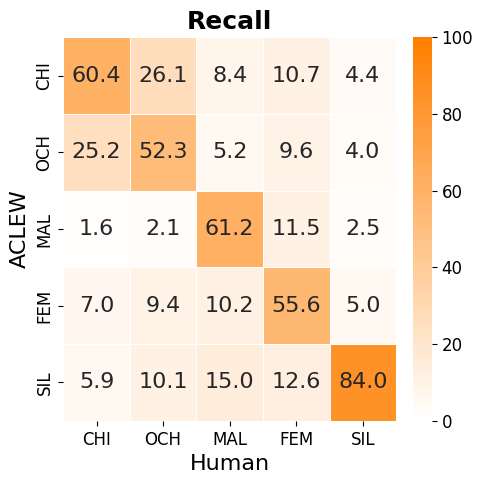

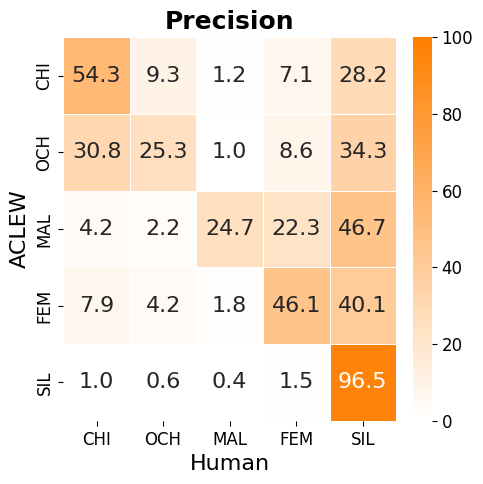

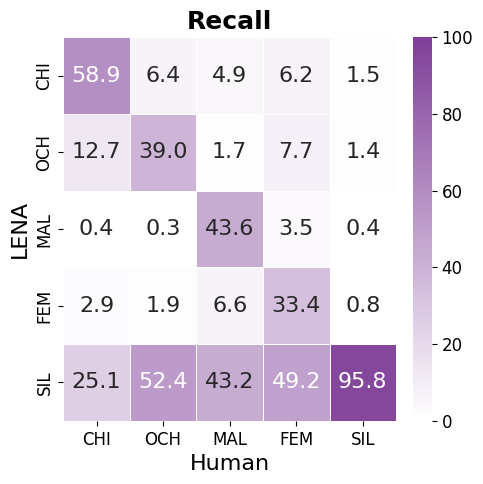

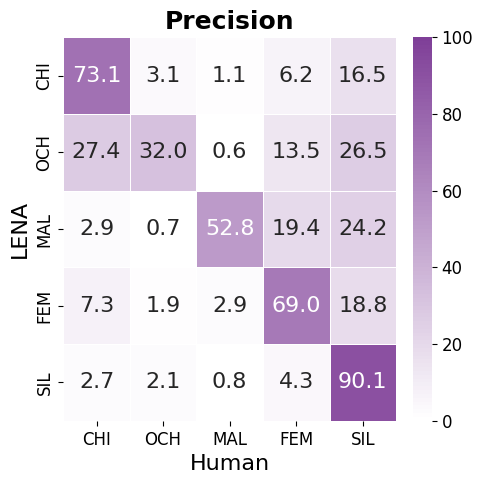

all


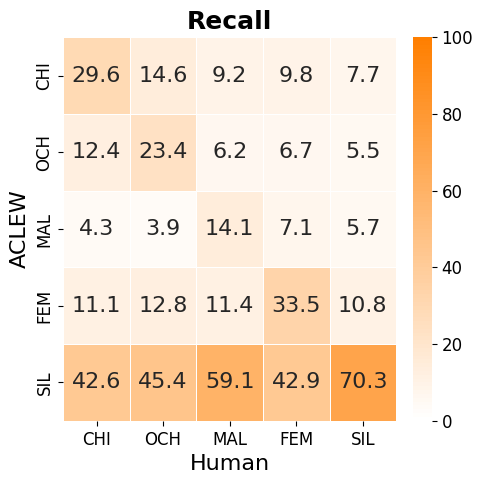

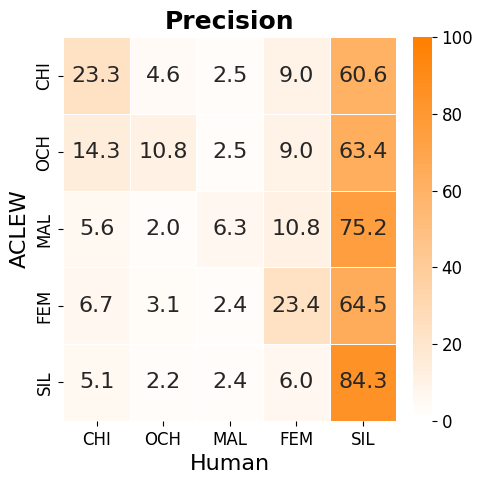

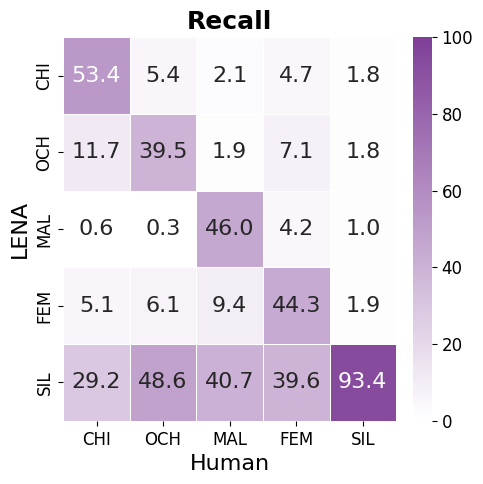

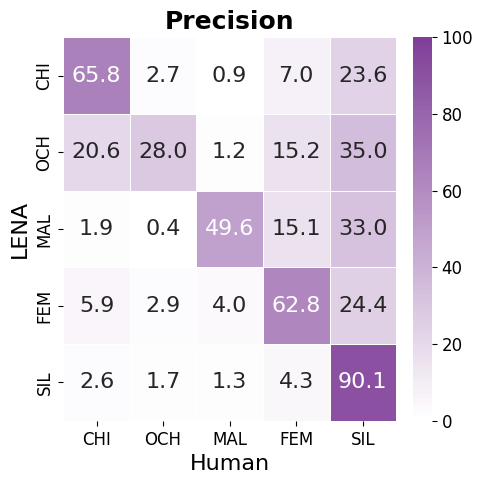

angelman_syndrome


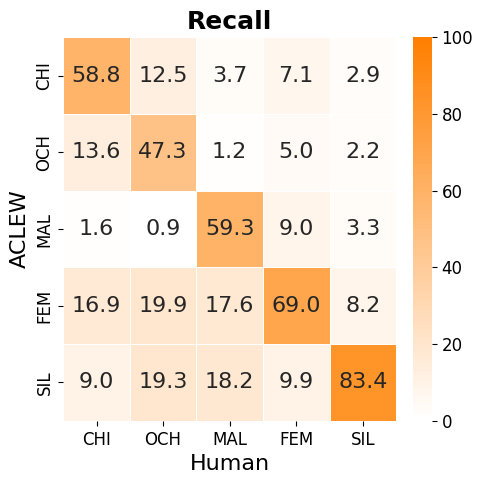

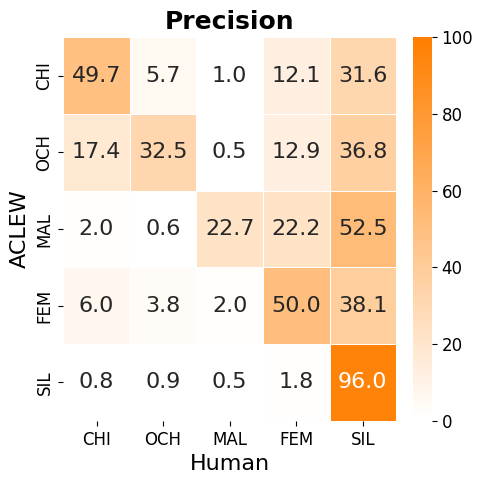

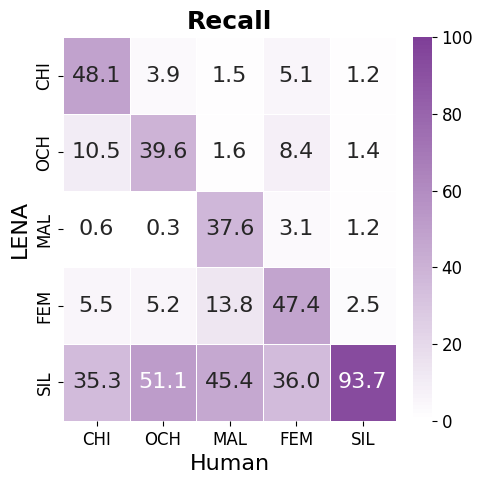

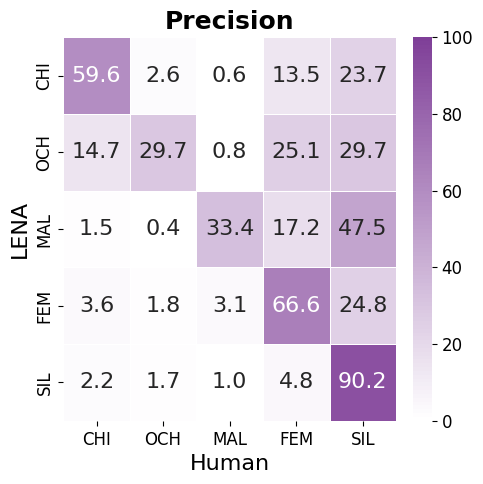

autism_sibling


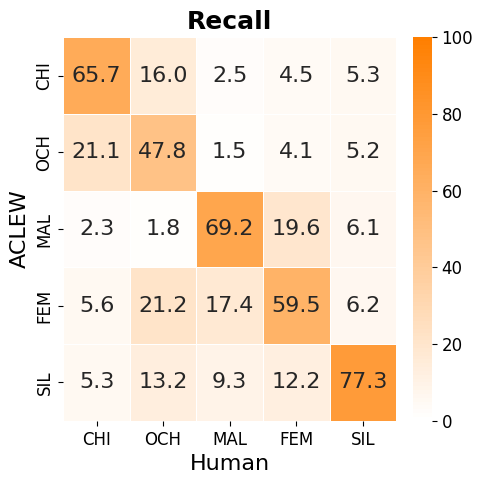

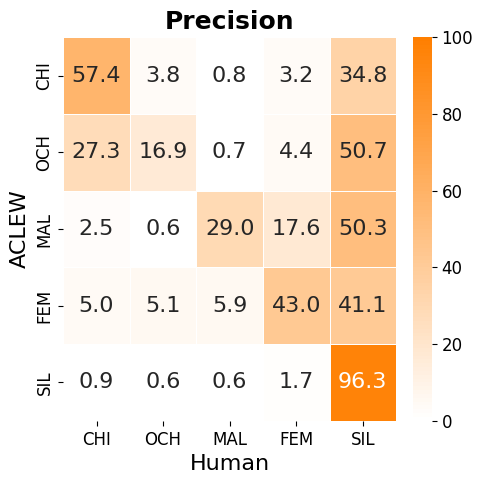

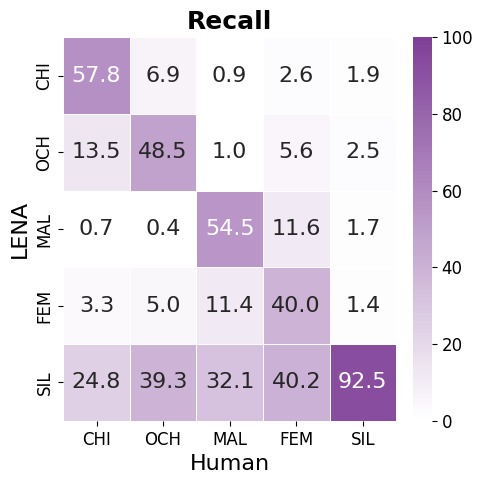

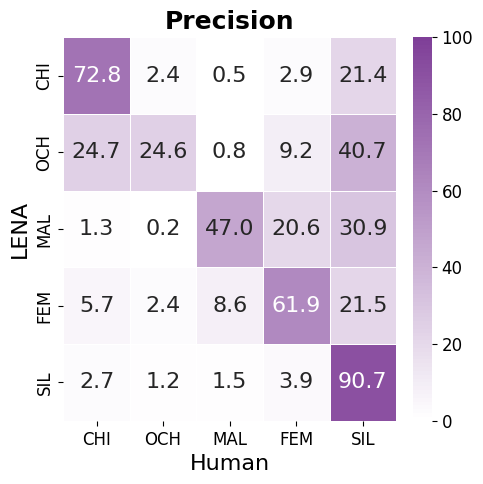

down_syndrome


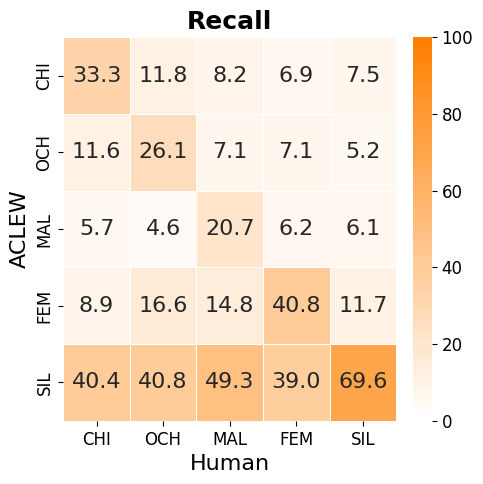

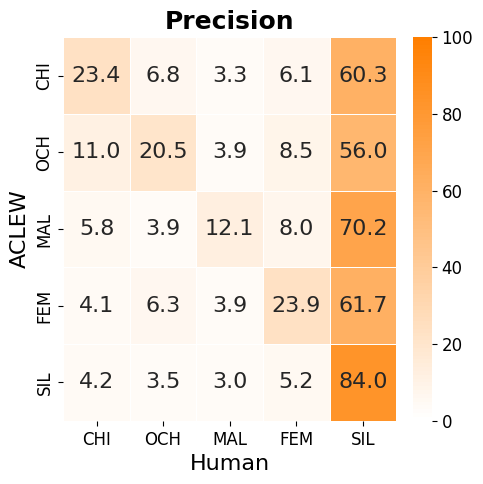

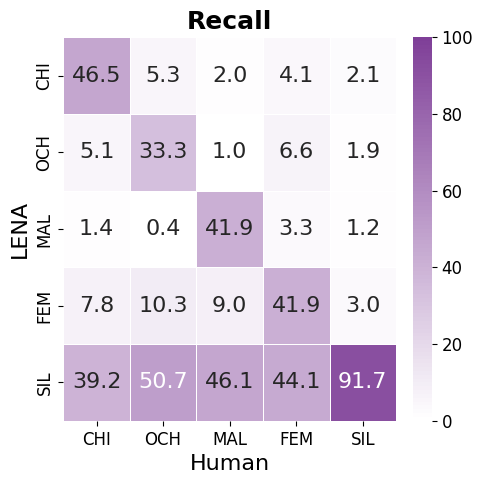

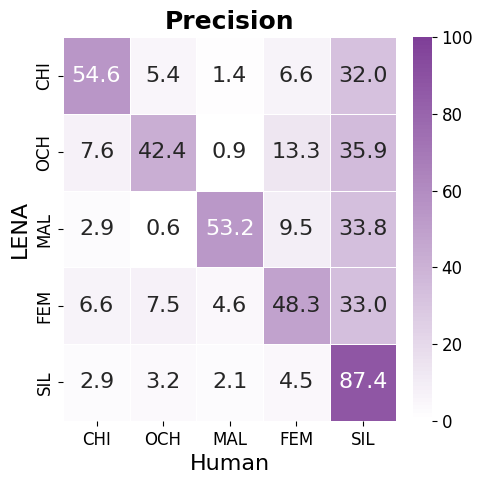

fragile_x_syndrome


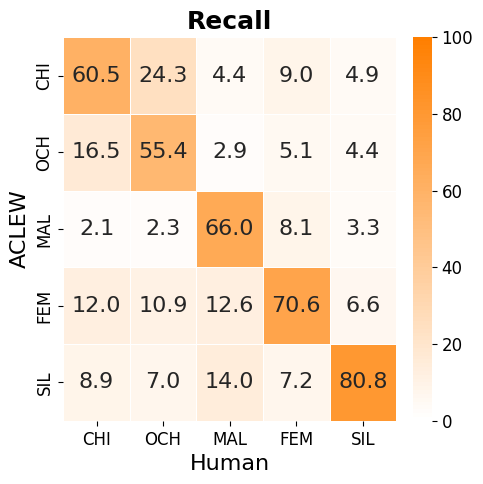

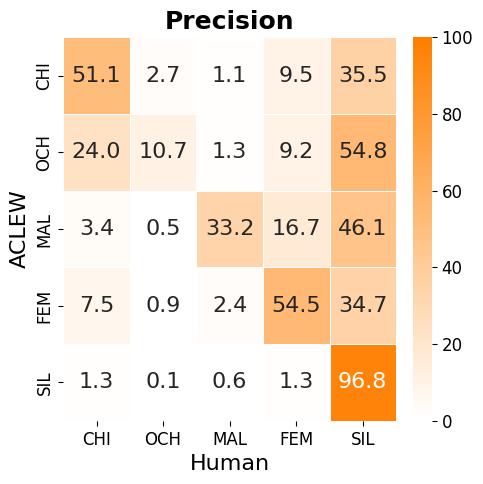

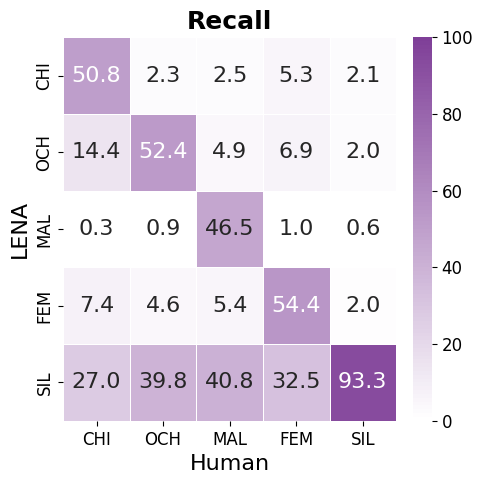

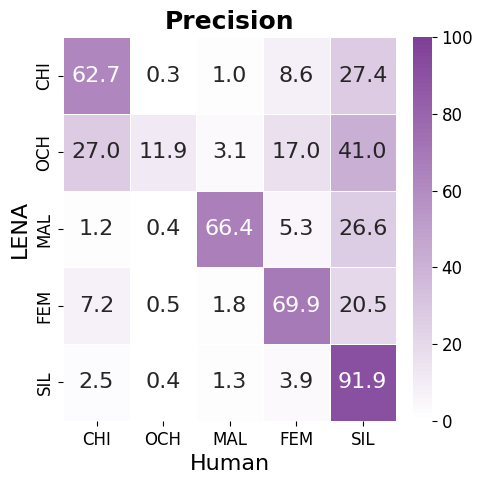

In [32]:
for group_id in group_ids:
    print(group_id)
    vtc_conf = np.load(DATA_PATH / 'vtc_eaf_an1' / f'conf_{group_id}.npy')
    plot_conf(vtc_conf, norm=0, ylabel = 'ACLEW', title='Recall', color=aclew_color, save=result_path / f'vtc_{group_id}_recall.png')
    plot_conf(vtc_conf, norm=1, ylabel = 'ACLEW',title='Precision', color=aclew_color, save=result_path / f'vtc_{group_id}_precision.png')

    lena_conf = np.load(DATA_PATH / 'its_eaf_an1' / f'conf_{group_id}.npy')
    plot_conf(lena_conf, norm=0, ylabel = 'LENA', title='Recall', color=lena_color, save=result_path / f'lena_{group_id}_recall.png')
    plot_conf(lena_conf, norm=1, ylabel = 'LENA',title='Precision', color=lena_color, save=result_path / f'lena_{group_id}_precision.png')


In [13]:
conf_all = np.load(DATA_PATH / 'vtc_eaf_an1' / f'conf_all.npy')
for group in group_ids:
    print(group)
    tt = np.load(DATA_PATH / 'vtc_eaf_an1' / f'conf_{group}.npy')
    print(tt)

low_risk
[[ 12331   2111    262   1603   6391]
 [  5151   4227    163   1442   5730]
 [   326    168   1907   1719   3604]
 [  1421    757    319   8324   7238]
 [  1195    812    466   1884 120958]]
all
[[ 21925   4254   2310   8387  56671]
 [  9098   6854   1566   5722  40331]
 [  3127   1129   3574   6039  42001]
 [  8202   3737   2867  28561  78733]
 [ 31263  13261  14889  36635 515752]]
angelman_syndrome
[[  6543    749    131   1593   4158]
 [  1517   2832     41   1120   3204]
 [   181     54   2076   2028   4802]
 [  1880   1191    615  15560  11850]
 [  1007   1155    638   2235 120990]]
autism_sibling
[[ 12445    825    184    703   7542]
 [  3988   2463    107    640   7410]
 [   438     95   4999   3036   8658]
 [  1061   1091   1256   9200   8807]
 [  1008    683    673   1892 110313]]
down_syndrome
[[ 4297  1188   590  1064 10714]
 [ 1427  2630   499  1097  7205]
 [  699   465  1509   967  8656]
 [ 1179  1671  1042  6311 16359]
 [ 5028  4105  3532  6045 98552]]
fragile_x_